In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size': '16'
})

In [2]:
H0 = pd.read_excel('resources/H0.xlsx',header=(0,1),index_col=0)
G0 = pd.read_excel('resources/G0.xlsx',header=(0,1),index_col=0)          #Gewerbe
G1 = pd.read_excel('resources/G1.xlsx',header=(0,1),index_col=0)          #Gewerbe
G2 = pd.read_excel('resources/G2.xlsx',header=(0,1),index_col=0)          #Spaetbetrieb
G3 = pd.read_excel('resources/G3.xlsx',header=(0,1),index_col=0)          #Durchlaufend
G4 = pd.read_excel('resources/G4.xlsx',header=(0,1),index_col=0)          #Laden
G5 = pd.read_excel('resources/G5.xlsx',header=(0,1),index_col=0)          #Laden
G6 = pd.read_excel('resources/G6.xlsx',header=(0,1),index_col=0)          #Laden
L0 = pd.read_excel('resources/L0.xlsx',header=(0,1),index_col=0)
L1 = pd.read_excel('resources/L1.xlsx',header=(0,1),index_col=0)
L2 = pd.read_excel('resources/L2.xlsx',header=(0,1),index_col=0)
ULC = pd.read_excel('resources/econtrol_ulc.xlsx',header=0,index_col=0)
HF = pd.read_excel('resources/econtrol_hf.xlsx',header=(0,1),index_col=0)

In [3]:
H0

Winter                  Sommer                 Übergangszeit  \
Zeit     Samstag Sonntag Werktag Samstag Sonntag Werktag       Samstag   
00:15:00    70.8    87.5    67.6    89.8   100.1    86.3          80.2   
00:30:00    68.2    81.1    60.8    84.9    92.5    76.9          75.1   
00:45:00    65.9    75.0    54.9    80.7    85.9    68.8          70.7   
01:00:00    63.3    69.1    49.9    76.6    79.9    62.4          66.6   
01:15:00    59.5    63.4    46.2    71.7    74.1    58.0          62.3   
...          ...     ...     ...     ...     ...     ...           ...   
23:00:00   118.2   104.0   105.7   146.5   133.2   135.7         137.3   
23:15:00   113.4    96.2    98.0   139.8   124.4   127.2         131.1   
23:30:00   107.4    88.4    90.2   130.3   113.8   117.5         121.9   
23:45:00   100.8    80.7    82.5   119.5   102.5   107.1         111.5   
00:00:00    94.1    73.2    74.9   109.0    91.6    96.5         101.5   

                          
Zeit     Sonntag Werktag  
00:15:00    93.4    77.8  
00:30:00    86.8    69.6  
00:45:00    81.2    62.4  
01:00:00    75.7    56.6  
01:15:00    70.1    52.5  
...          ...     ...  
23:00:00   116.5   123.2  
23:15:00   107.6   114.0  
23:30:00    98.4   104.8  
23:45:00    89.2    95.6  
00:00:00    80.7    86.6  

[96 rows x 9 columns]

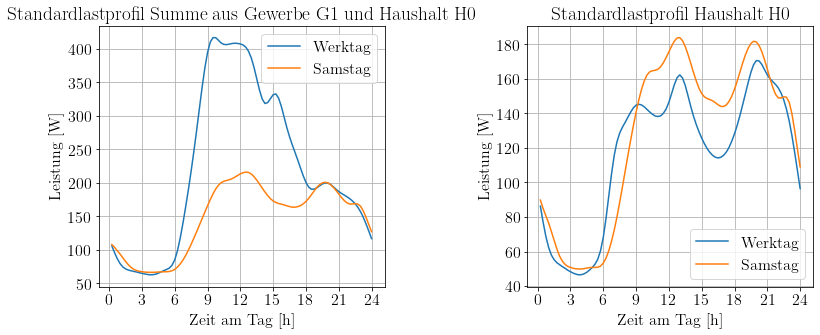

In [27]:
subfig, axs = plt.subplots(1,2,figsize=(12.8,4.8))

X=np.linspace(1,96,96)

nr = 0
A=H0.loc[:,'Sommer'].loc[:,'Werktag'].to_numpy()+0.8*G1.loc[:,'Sommer'].loc[:,'Werktag'].to_numpy()
B=H0.loc[:,'Sommer'].loc[:,'Samstag'].to_numpy()+0.8*G1.loc[:,'Sommer'].loc[:,'Samstag'].to_numpy()
axs[nr].plot(X,A)
axs[nr].plot(X,B)
axs[nr].set_xlabel('Zeit am Tag [h]')
axs[nr].set_xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
axs[nr].set_ylabel('Leistung [W]')
axs[nr].set_title('Standardlastprofil Summe aus Gewerbe G1 und Haushalt H0')
axs[nr].legend(['Werktag','Samstag'])
axs[nr].grid()

nr = 1
A=H0.loc[:,'Sommer'].loc[:,'Werktag'].to_numpy()
B=H0.loc[:,'Sommer'].loc[:,'Samstag'].to_numpy()
axs[nr].plot(X,A)
axs[nr].plot(X,B)
axs[nr].set_xlabel('Zeit am Tag [h]')
axs[nr].set_xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
axs[nr].set_ylabel('Leistung [W]')
axs[nr].set_title('Standardlastprofil Haushalt H0')
axs[nr].legend(['Werktag','Samstag'],loc='lower right')
axs[nr].grid()

plt.subplots_adjust(wspace=0.5)

plt.savefig('export/1x2_h0_g1.pdf',bbox_inches='tight')

In [9]:
A.shape

(96,)

In [5]:
X=np.linspace(1,96,96)

In [ ]:
subfig, axs = plt.subplots(3,2,figsize=(12.8,16))
column=-1


profil=H0
titel = 'Haushalt H0'
season_count=0
for season in ['Winter','Übergangszeit','Sommer']:
    day_count=0
    #column = column+1
    for day in ['Werktag','Samstag','Sonntag']:
        axs[season_count,0].plot(np.linspace(1,96,96), profil.loc[:,season].loc[:,day].to_numpy())
        axs[season_count,0].legend(['Werktag','Samstag','Sonntag'])
        axs[season_count,0].set_ylabel('Leistung [W]')
        axs[season_count,0].set_xlabel('Zeit am Tag [h]')
        axs[season_count,0].set_xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
        axs[season_count,0].set_title('Standardlastprofil ' + titel + ' für ' + season)
        axs[season_count,0].grid()
        axs[day_count,1].plot(np.linspace(1,96,96), profil.loc[:,season].loc[:,day].to_numpy())
        axs[day_count,1].legend(['Winter','Übergangszeit','Sommer'])
        axs[day_count,1].set_ylabel('Leistung [W]')
        axs[day_count,1].set_xlabel('Zeit am Tag [h]')
        axs[day_count,1].set_xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
        axs[day_count,1].set_title('Standardlastprofil ' + titel + ' für ' + day)
        axs[day_count,1].grid()
        day_count=day_count+1
    season_count = season_count+1
    plt.subplots_adjust(hspace=0.5,wspace=0.3)

plt.savefig('export/3x2_plot_h0.pdf',bbox_inches='tight')


In [ ]:
profil=HF
titel = 'Haushalt mit Elektrospeicherheizung HF'
season_count=0
for season in ['Winter','Uebergang','Sommer']:
    plt.plot(np.linspace(1,96,96), profil.loc[:,season].loc[:,'Werktag'].to_numpy())
    plt.legend(['Werktag','Samstag','Sonntag'])
plt.ylabel('Leistung [W]')
plt.xlabel('Zeit am Tag [h]')
plt.xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
#plt.title('Standardlastprofil ' + titel + ' für ' + season + ', werktags')
plt.grid()
plt.legend(['Winter','Übergangszeit','Sommer'])

plt.savefig('export/1x1_plot_hf.pdf',bbox_inches='tight')
